In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/datasets/hotel_bookings.csv")
df.head(10) 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,7/3/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,7/3/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2015


In [3]:
df.shape

(119390, 32)

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.drop(['agent', 'company'], axis=1, inplace=True)

In [6]:
df.country.value_counts().index[0]

'PRT'

In [7]:
df['country'].fillna(df.country.value_counts().index[0], inplace=True)

In [8]:
df.fillna(0, inplace=True)

In [9]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [10]:
filter1 = (df['children'] ==0) & (df['adults'] == 0) & (df['babies'] == 0)
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [11]:
data = df[~filter1]

In [12]:
data.shape

(119210, 30)

In [13]:
df.shape

(119390, 30)

In [14]:
df[df['children'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [15]:
data['is_canceled'].unique()

array([0, 1], dtype=int64)

In [16]:
data[data['is_canceled'] ==0]['country'].value_counts()/75011

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [17]:
len(data[data['is_canceled'] ==0])

75011

In [18]:
country_wise_data = data[data['is_canceled'] ==0]['country'].value_counts().reset_index()
country_wise_data.columns=[ 'country', 'num_of_guests']
country_wise_data

,country,num_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [19]:
#!pip install plotly
!pip install  chart_studio

In [20]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [21]:
import plotly.express as px

In [22]:
map_guests = px.choropleth(country_wise_data, locations = country_wise_data['country'],
                          color=country_wise_data['num_of_guests'],
                          hover_name=country_wise_data['country'],
                          title='home country of guests')

In [23]:
map_guests.show()

In [24]:
data2 = data[data['is_canceled']==0]

In [25]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price(EUR)')

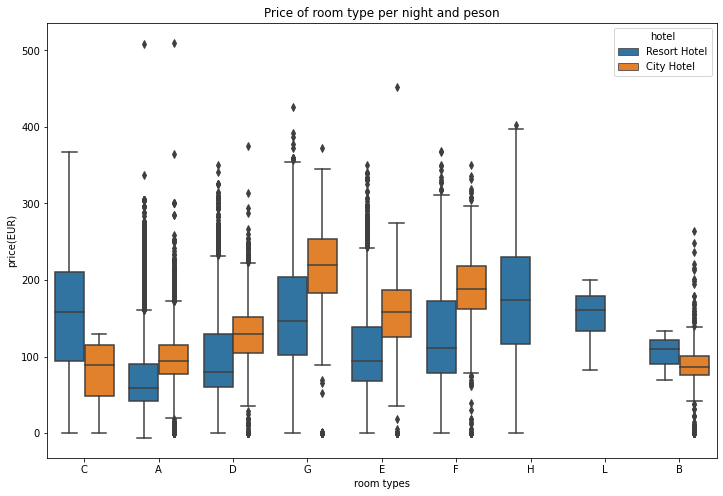

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=data2)
plt.title("Price of room type per night and peson")
plt.xlabel('room types')
plt.ylabel('price(EUR)')

In [27]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [28]:
data_resort = data[(data['hotel'] == "Resort Hotel") & (data['is_canceled']==0)]
data_city = data[(data['hotel'] == "City Hotel") & (data['is_canceled']==0)]


In [29]:
data_resort['arrival_date_month'].value_counts()

August       3257
July         3137
October      2575
March        2571
April        2550
May          2535
February     2308
September    2102
June         2037
December     2014
November     1975
January      1866
Name: arrival_date_month, dtype: int64

In [30]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month', 'no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [31]:
rush_city = data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month', 'no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [32]:
final_rush = rush_resort.merge(rush_city, on='month')
final_rush.columns=['month', 'no_of_geusts_in_resort', 'no_of_guests_city']
final_rush

,month,no_of_geusts_in_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [33]:
#!pip install sorted-months-weekdays
#!pip install sort_dataframeby_monthorweek
import sort_dataframeby_monthorweek as sd

In [34]:
final_rush = sd.Sort_Dataframeby_Month(final_rush, 'month')


In [35]:
final_rush.columns

Index(['month', 'no_of_geusts_in_resort', 'no_of_guests_city'], dtype='object')

In [36]:
px.line(data_frame=final_rush, x='month', y=['no_of_geusts_in_resort', 'no_of_guests_city'])

In [37]:
data = sd.Sort_Dataframeby_Month(data, 'arrival_date_month')

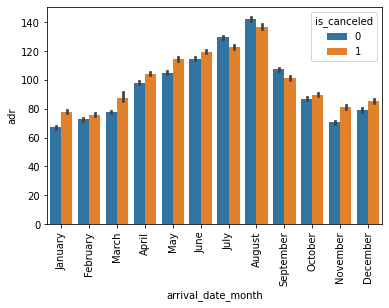

In [38]:
sns.barplot(x='arrival_date_month', y='adr', data=data, hue='is_canceled')
plt.xticks(rotation="vertical")
plt.show()

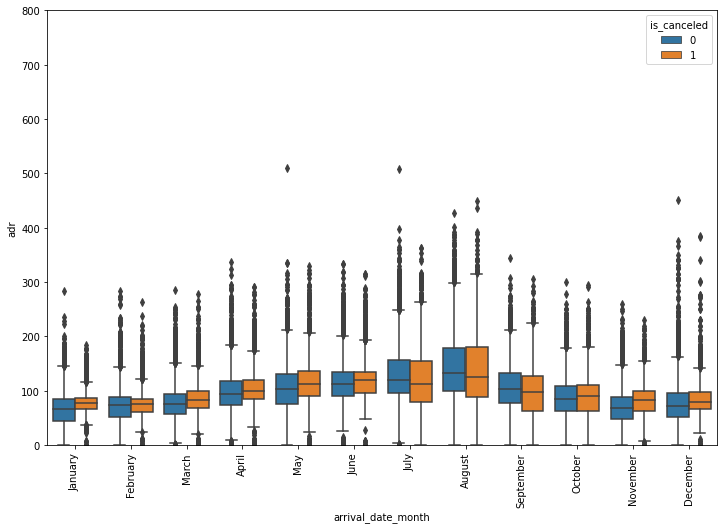

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='arrival_date_month', y='adr', data=data, hue='is_canceled')
plt.xticks(rotation="vertical")
plt.ylim(0, 800)
plt.show()

In [40]:
pd.crosstab(index=data['stays_in_weekend_nights'], columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
def week_function(row):
    feature1 = "stays_in_weekend_nights"
    feature2 = "stays_in_week_nights"
    if row[feature2] == 0 and row[feature1] >0:
        return 'stay_just_weekend'
    elif row[feature1] == 0 and row[feature2] > 0:
        return 'stay_just_weekdays'
    elif row[feature1] > 0 and row[feature2] > 0:
        return 'stays_both_weekdays_and_weekend'
    else:
        return 'undifined_data'
 

In [42]:
data2['weekend_or_weekday']=data2.apply(week_function, axis=1)

In [43]:
data2.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undifined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undifined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,stay_just_weekdays


In [44]:
data2['weekend_or_weekday'].value_counts()

stays_both_weekdays_and_weekend    37551
stay_just_weekdays                 31788
stay_just_weekend                   5050
undifined_data                       622
Name: weekend_or_weekday, dtype: int64

In [45]:
data2 = sd.Sort_Dataframeby_Month(data2, 'arrival_date_month')

In [46]:
group_data = data2.groupby(['arrival_date_month', 'weekend_or_weekday']).size().unstack().reset_index()
group_data

weekend_or_weekday,arrival_date_month,stay_just_weekdays,stay_just_weekend,stays_both_weekdays_and_weekend,undifined_data
0,April,2559,344,3627,30
1,August,3137,509,4929,49
2,December,2123,298,1901,69
3,February,2514,360,2438,47
4,January,2125,393,1550,47
5,July,2818,462,4570,57
6,June,2685,433,3241,36
7,March,3060,359,3151,50
8,May,3017,570,3442,74
9,November,2214,261,2117,59


In [47]:
sorted_data = sd.Sort_Dataframeby_Month(group_data, 'arrival_date_month')

In [48]:
sorted_data.set_index('arrival_date_month', inplace=True)

In [49]:
sorted_data

,stay_just_weekdays,stay_just_weekend,stays_both_weekdays_and_weekend,undifined_data
arrival_date_month,,,,
January,2125,393,1550,47
February,2514,360,2438,47
March,3060,359,3151,50
April,2559,344,3627,30
May,3017,570,3442,74
June,2685,433,3241,36
July,2818,462,4570,57
August,3137,509,4929,49
September,2692,479,3192,22


<AxesSubplot:xlabel='arrival_date_month'>

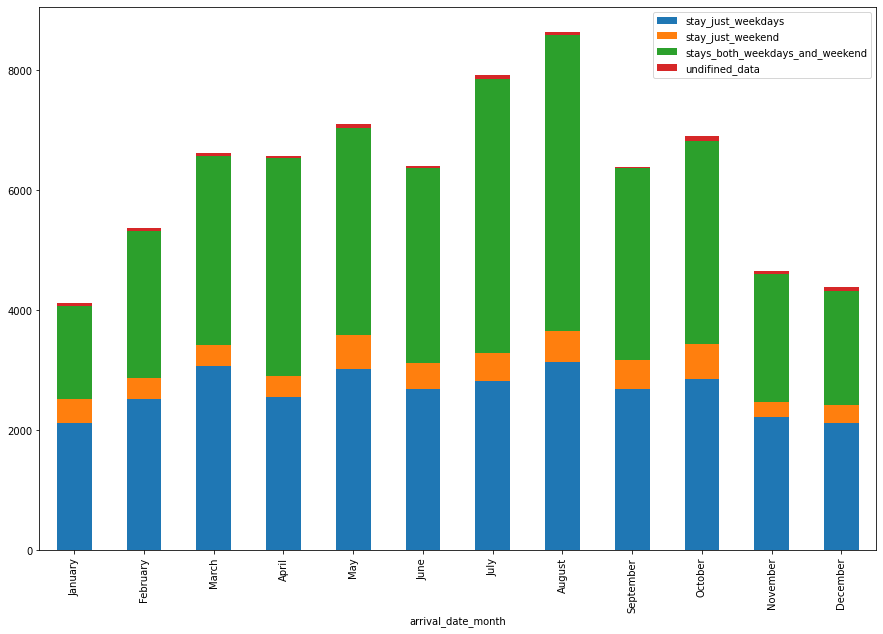

In [50]:
sorted_data.plot(kind='bar', stacked=True, figsize=(15, 10))

In [51]:
def family(row):
    if (row['adults']>0) & (row['children'] > 0 or row['babies'] > 0):
        return 1
    else:
        return 0
    

In [52]:
data['is_family']=data.apply(family, axis=1)

In [53]:
data['total_customer'] = data['adults'] + data['children'] + data['babies']

In [54]:
data['total_nights'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [55]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,0,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2


In [56]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [57]:
dict1 = {'No Deposit':0, 'Non Refund':1, 'Refundable':0}
data['deposit_given'] = data['deposit_type'].map(dict1)


In [58]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [59]:
data.drop(columns=['adults', 'children', 'babies', 'deposit_type'], axis=1, inplace=True)


In [60]:
data.shape

(119210, 30)

In [61]:
cate_features = [col for col in data.columns if data[col].dtype == 'object']
num_features = [col for col in data.columns if data[col].dtype != 'object']
cate_features
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [62]:
data_cat = data[cate_features]

In [63]:
data_cat

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015
...,...,...,...,...,...,...,...,...,...,...,...
119205,City Hotel,December,BB,BRA,Direct,Direct,E,F,Transient,Check-Out,1/6/2017
119206,City Hotel,December,SC,FRA,Online TA,TA/TO,A,A,Transient,Check-Out,1/6/2017
119207,City Hotel,December,BB,FRA,Offline TA/TO,TA/TO,A,B,Transient,Check-Out,1/7/2017
119208,City Hotel,December,SC,DEU,Online TA,TA/TO,A,A,Transient-Party,Check-Out,1/8/2017


In [64]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [65]:

data_cat['cancellation'] = data['is_canceled']


In [66]:
data.groupby(['hotel'])['is_canceled'].mean()

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: is_canceled, dtype: float64

In [67]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1


In [68]:
cols = data_cat.columns
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation'],
      dtype='object')

In [69]:
cols = cols[0:-1]

In [70]:
for col in cols:
    dict2 = data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col] = data_cat[col].map(dict2)

In [71]:
data_cat.head(5)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.407864,0.0,0.108247,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.407864,1.0,0.684211,1


In [72]:
dataframe = pd.concat([data_cat, data[num_features]], axis=1)
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [73]:
dataframe.drop(['cancellation'], axis=1, inplace=True)
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

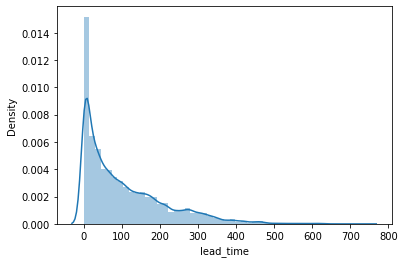

In [74]:
sns.distplot(dataframe['lead_time'])

In [75]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [76]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

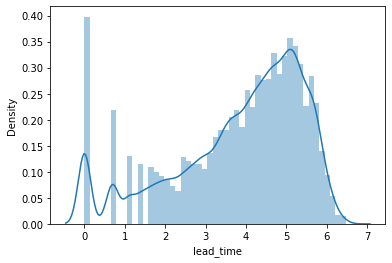

In [77]:
sns.distplot(dataframe['lead_time'])

In [78]:
handle_outlier('adr')

In [79]:
dataframe['adr'].isnull().sum()

1

<AxesSubplot:xlabel='adr', ylabel='Density'>

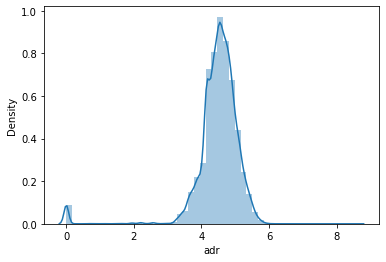

In [80]:
sns.distplot(dataframe['adr'].dropna())

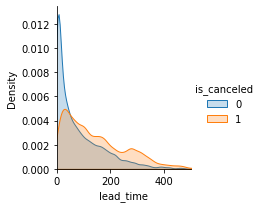

In [81]:
sns.FacetGrid(data, hue='is_canceled', xlim=(0, 500)).map(sns.kdeplot, 'lead_time', shade=True).add_legend()

In [82]:
corr = dataframe.corr()


In [83]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

In [84]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [85]:
features_to_drop = ['reservation_status', 'reservation_status_date', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']

In [86]:
dataframe.drop(features_to_drop, axis=1, inplace=True)

In [87]:
dataframe.shape

(119210, 24)

In [88]:
dataframe.dropna(inplace=True)
dataframe.shape

(119209, 24)

In [89]:
x = dataframe.drop('is_canceled', axis=1)
y = dataframe['is_canceled']

In [90]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [91]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005))

In [92]:
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [93]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [94]:
cols =x.columns

In [95]:
selected_feature = cols[feature_sel_model.get_support()]

In [96]:
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [97]:
x = x[selected_feature]

In [98]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size=0.25)

In [124]:
X_train.shape

(89406, 12)

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
logreg = LogisticRegression()

In [127]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [128]:
pred = logreg.predict(X_test)

In [129]:
pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
confusion_matrix(y_test, pred)

array([[17356,  1368],
       [ 4761,  6318]], dtype=int64)

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
accuracy_score(y_test, pred)

0.7943495621246184

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
score = cross_val_score(logreg, x, y, cv=10)

In [136]:
score

array([0.77862595, 0.78424629, 0.78240081, 0.81377401, 0.81511618,
       0.74062579, 0.74272293, 0.8557168 , 0.83642312, 0.80369128])

In [137]:
score.mean()

0.79533431500105

In [144]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [145]:
models = []
models.append(('Logistic_Regression',LogisticRegression()))
models.append(('Naive_Bayes',GaussianNB()))
models.append(('Random_Forest',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Decision_Tree',DecisionTreeClassifier()))

In [146]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [147]:
for name, model in models:
    print(name)
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cm = confusion_matrix(predictions, y_test)
    print(cm)
    
    acc = accuracy_score(predictions, y_test)
    print(acc)
    print('\n')

Logistic_Regression
[[17356  4761]
 [ 1368  6318]]
0.7943495621246184


Naive_Bayes
[[ 6758   661]
 [11966 10418]]
0.5763178203536556


Random_Forest
[[17185  2735]
 [ 1539  8344]]
0.8565916182934604


KNN
[[16756  3370]
 [ 1968  7709]]
0.8208905143777472


Decision_Tree
[[16014  2595]
 [ 2710  8484]]
0.8219977854578399


